### Import relevant libraries

In [1]:
import tensorflow as tf
import os
import matplotlib.pyplot as plt
import numpy as np

### Remove unreliable/corrupted images

In [2]:
import cv2
import imghdr

In [3]:
data_dir = 'images'

In [4]:
os.listdir(data_dir)

['happy', 'sad']

In [5]:
os.listdir(os.path.join(data_dir, 'happy'))

['05-12-21-happy-people.jpg',
 '1-2.jpg',
 '1000_F_165246984_Ihe5LVattiq8zEPivcPqrtM85x7noWJw.jpg',
 '107307587-1695837909104-gettyimages-1446934118-istock_2022_10_17-ja1-107.jpeg',
 '13ryLrJDyVF05wXDYYUXcJQ.jpeg',
 '170404-happy-workers-feature.jpg',
 '1920px-face-smile.svg_.png',
 '1HEoLBLidT2u4mhJ0oiDgig.png',
 '343515-worldhappinessreport1440.jpg',
 '35438_hd.jpg',
 '360_F_237330799_fynB7PDF8qXuq2qYTEKOa6E0Lt8Vbzv6.jpg',
 '360_F_313450534_bHkt5SoetREYpgWO5uOpceVnaDCngOX7.jpg',
 '360_F_484873483_hg1ofIdXbMha5lKEDG3hJBrwKh1oikTq.jpg',
 '56f455011e0000b300705475.jpeg',
 '6a4264642bba4cbce747ef68613fa71122b7db1f8ab4fa1c7bedeab635dd1146.png',
 '7-principles-of-successful-and-happy-people.png',
 '8e06de1bf2171da2312b6de61c61e4bc.jpg',
 '960x0.jpg',
 'A_Sep20_14_1189155141.jpg',
 'brady-bunch-3.jpg',
 'business-people-succesful-celebrating-group-successful-39416686-800x500.jpg',
 'compassion-900x387.jpg',
 'diverse-friends-students-shoot_53876-47012.jpg',
 'diverse-happy-people-united-con

In [6]:
image_extensions = ['jpeg', 'jpg', 'png', 'bmp']

In [7]:
img = cv2.imread(os.path.join('images', 'happy', '35438_hd.jpg'))
img.shape

(649, 1240, 3)

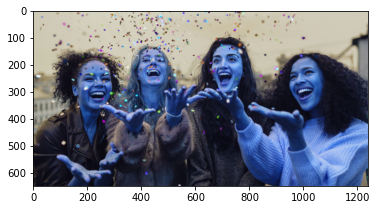

In [8]:
plt.imshow(img)

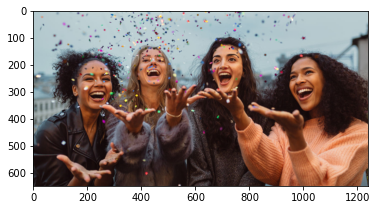

In [9]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

OpenCV uses BGR image format while matplotlib uses RGB.

In [10]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_extensions: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))

### Load Data

In [11]:
data = tf.keras.utils.image_dataset_from_directory('images')

Found 192 files belonging to 2 classes.


In [12]:
data_iterator = data.as_numpy_iterator()

In [13]:
batch = data_iterator.next()

In [14]:
batch

(array([[[[3.25917969e+01, 2.15917969e+01, 8.72116089e-02],
          [3.58457870e+01, 2.39024277e+01, 1.37915802e+00],
          [4.10200424e+01, 2.67309799e+01, 1.92145538e+00],
          ...,
          [1.80000000e+01, 1.50000000e+01, 8.00000000e+00],
          [1.49433594e+01, 1.49433594e+01, 6.94335938e+00],
          [1.38098679e+01, 1.35045853e+01, 7.37109375e+00]],
 
         [[3.01464844e+01, 1.91464844e+01, 0.00000000e+00],
          [3.36621094e+01, 2.07753906e+01, 1.72826385e+00],
          [3.86933594e+01, 2.49765625e+01, 2.59654236e+00],
          ...,
          [1.70000000e+01, 1.40000000e+01, 7.00000000e+00],
          [1.61584549e+01, 1.31584549e+01, 6.15845490e+00],
          [1.46289062e+01, 1.30000000e+01, 7.37109375e+00]],
 
         [[2.83144531e+01, 1.68940201e+01, 0.00000000e+00],
          [3.18300781e+01, 1.89433594e+01, 1.88671875e+00],
          [3.70267410e+01, 2.28822098e+01, 2.73767853e+00],
          ...,
          [1.76132812e+01, 1.33867188e+01, 7.0000

In [15]:
len(batch) # image and label

2

In [16]:
batch[1]

array([1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0])

0 means happy and 1 means sad.

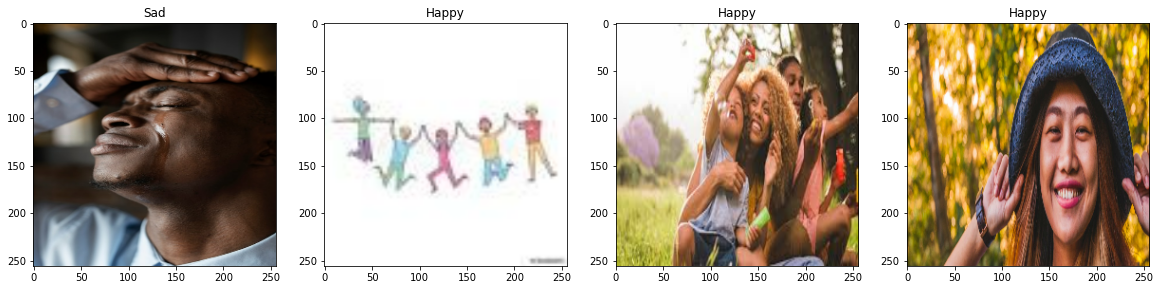

In [17]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    label = 'Happy' if batch[1][idx] == 0 else 'Sad'
    ax[idx].set_title(label)

### Scaling

 Preprocess image data by scaling the pixel values between 0 to 1 (RGB values range from 0 to 255).

In [18]:
data = data.map(lambda x,y: (x/255, y))

In [19]:
scaled_iterator = data.as_numpy_iterator()

In [20]:
batch = scaled_iterator.next()

### Split data

In [21]:
len(data)

6

6 batches and each batch has 32 images

In [22]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)+1

In [23]:
train_size

4

In [24]:
val_size

1

In [25]:
test_size

1

In [26]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

## Modeling

### Build Deep Learning Model

In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [28]:
model = Sequential()

In [29]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [30]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [31]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

### Training

In [32]:
logdir = 'logs'

In [33]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [34]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
4/4 [==============================] - 3s 530ms/step - loss: 1.1475 - accuracy: 0.5703 - val_loss: 0.7331 - val_accuracy: 0.3750
Epoch 2/20
4/4 [==============================] - 2s 536ms/step - loss: 0.6686 - accuracy: 0.5312 - val_loss: 0.6177 - val_accuracy: 0.5938
Epoch 3/20
4/4 [==============================] - 2s 478ms/step - loss: 0.6160 - accuracy: 0.6328 - val_loss: 0.5734 - val_accuracy: 0.6250
Epoch 4/20
4/4 [==============================] - 3s 534ms/step - loss: 0.5284 - accuracy: 0.7031 - val_loss: 0.4892 - val_accuracy: 0.8438
Epoch 5/20
4/4 [==============================] - 2s 493ms/step - loss: 0.4938 - accuracy: 0.7969 - val_loss: 0.4086 - val_accuracy: 0.8125
Epoch 6/20
4/4 [==============================] - 2s 446ms/step - loss: 0.3496 - accuracy: 0.9141 - val_loss: 0.2737 - val_accuracy: 0.9688
Epoch 7/20
4/4 [==============================] - 2s 433ms/step - loss: 0.3433 - accuracy: 0.9219 - val_loss: 0.2922 - val_accuracy: 0.9688
Epoch 8/20
4/4 [====

### Plot Performance

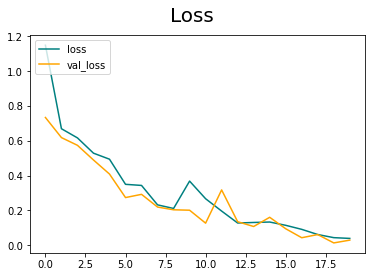

In [35]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

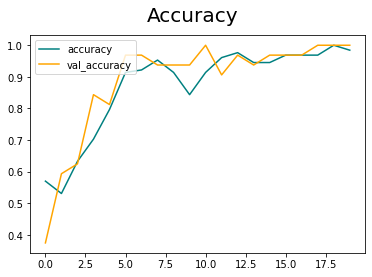

In [36]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

### Evaluation

In [37]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [38]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [39]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 137ms/step


In [41]:
print(f'Precision: {pre.result().numpy()}, Recall: {re.result().numpy()}, Accuracy: {acc.result().numpy()}')

Precision: 1.0, Recall: 0.9090909361839294, Accuracy: 0.96875


### Test

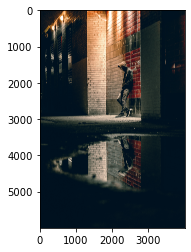

In [70]:
img = cv2.imread('sad.jpg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

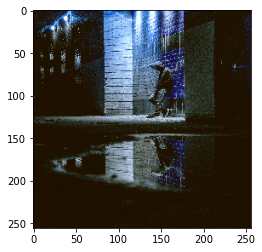

In [74]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [67]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 15ms/step


In [68]:
yhat

array([[0.9999672]], dtype=float32)

In [69]:
if yhat > 0.5: 
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Sad


### Save the Model

In [75]:
from tensorflow.keras.models import load_model

In [76]:
model.save(os.path.join('models','imageclassifier.h5'))

In [79]:
new_model = load_model(os.path.join('models', 'imageclassifier.h5'))

In [81]:
yhatnew = new_model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 16ms/step


In [82]:
if yhatnew > 0.5: 
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Sad
